In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Caminhos das pastas
RAW_PATH = "../dados/raw/"
PROCESSED_PATH = "../dados/processed/"

In [3]:
# Carregamento dos arquivos brutos
movies = pd.read_csv(os.path.join(RAW_PATH, "movies_metadata.csv"), low_memory=False)
credits = pd.read_csv(os.path.join(RAW_PATH, "credits.csv"))
#ratings = pd.read_csv(os.path.join(RAW_PATH, "ratings.csv"))

# Exibe informações básicas
print("Movies shape:", movies.shape)
print("Credits shape:", credits.shape)
#print("Ratings shape:", ratings.shape)

Movies shape: (45466, 24)
Credits shape: (45476, 3)


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## Movies

### Selecionando Colunas

In [6]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
cols_interesse = [
    "id", "title", "release_date", "genres", "runtime", "budget", "revenue",
    "popularity", "vote_average", "vote_count", "original_language", "status"
]
movies = movies[cols_interesse]
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45466 non-null  object 
 1   title              45460 non-null  object 
 2   release_date       45379 non-null  object 
 3   genres             45466 non-null  object 
 4   runtime            45203 non-null  float64
 5   budget             45466 non-null  object 
 6   revenue            45460 non-null  float64
 7   popularity         45461 non-null  object 
 8   vote_average       45460 non-null  float64
 9   vote_count         45460 non-null  float64
 10  original_language  45455 non-null  object 
 11  status             45379 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


### Conversão de tipos

In [8]:
"""
movies["id"] = movies["id"].astype(int)
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")
movies["popularity"] = pd.to_numeric(movies["popularity"], errors="coerce")
movies.info()
"""

'\nmovies["id"] = movies["id"].astype(int)\nmovies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")\nmovies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")\nmovies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")\nmovies["popularity"] = pd.to_numeric(movies["popularity"], errors="coerce")\nmovies.info()\n'

In [9]:
'''
# Verificar valores não numéricos na coluna 'id'
invalid_ids = movies[~movies["id"].astype(str).str.isdigit()]
print("Linhas com id inválido:", len(invalid_ids))
display(invalid_ids[["id", "title", "release_date"]].head(10))
'''

'\n# Verificar valores não numéricos na coluna \'id\'\ninvalid_ids = movies[~movies["id"].astype(str).str.isdigit()]\nprint("Linhas com id inválido:", len(invalid_ids))\ndisplay(invalid_ids[["id", "title", "release_date"]].head(10))\n'

In [10]:
# Mantém apenas linhas cujo id é totalmente numérico
movies = movies[movies["id"].astype(str).str.isdigit()].copy()

# Realizar conversão
movies["id"] = movies["id"].astype(int)
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")
movies["popularity"] = pd.to_numeric(movies["popularity"], errors="coerce")
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 45463 non-null  int64         
 1   title              45460 non-null  object        
 2   release_date       45376 non-null  datetime64[ns]
 3   genres             45463 non-null  object        
 4   runtime            45203 non-null  float64       
 5   budget             45463 non-null  int64         
 6   revenue            45460 non-null  float64       
 7   popularity         45460 non-null  float64       
 8   vote_average       45460 non-null  float64       
 9   vote_count         45460 non-null  float64       
 10  original_language  45452 non-null  object        
 11  status             45379 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 4.5+ MB


### Valores Ausentes

In [11]:
movies = movies.dropna().reset_index(drop=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45043 entries, 0 to 45042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 45043 non-null  int64         
 1   title              45043 non-null  object        
 2   release_date       45043 non-null  datetime64[ns]
 3   genres             45043 non-null  object        
 4   runtime            45043 non-null  float64       
 5   budget             45043 non-null  int64         
 6   revenue            45043 non-null  float64       
 7   popularity         45043 non-null  float64       
 8   vote_average       45043 non-null  float64       
 9   vote_count         45043 non-null  float64       
 10  original_language  45043 non-null  object        
 11  status             45043 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 4.1+ MB


In [12]:
movies.describe()

,id,release_date,runtime,budget,revenue,popularity,vote_average,vote_count
count,45043.000000,45043,45043.000000,4.504300e+04,4.504300e+04,45043.000000,45043.000000,45043.000000
mean,107219.271985,1992-05-02 06:29:57.802100224,94.231623,4.263376e+06,1.131304e+07,2.946408,5.637648,110.887996
min,2.000000,1874-12-09 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,26231.000000,1978-09-14 00:00:00,85.000000,0.000000e+00,0.000000e+00,0.399826,5.000000,3.000000
50%,59231.000000,2001-08-17 00:00:00,95.000000,0.000000e+00,0.000000e+00,1.143067,6.000000,10.000000
75%,153883.500000,2010-12-13 12:00:00,107.000000,0.000000e+00,0.000000e+00,3.737918,6.800000,35.000000
max,469172.000000,2020-12-16 00:00:00,1256.000000,3.800000e+08,2.787965e+09,547.488298,10.000000,14075.000000
std,111636.351120,NaN,38.309228,1.750047e+07,6.462029e+07,6.027265,1.896656,493.470332


In [13]:
# Seleciona apenas colunas numéricas
num_cols = movies.select_dtypes(include=["number"]).columns

# Conta quantos zeros há em cada coluna
zero_counts = (movies[num_cols] == 0).sum().sort_values(ascending=False)

print("Contagem de registros com valor 0 em cada coluna numérica:\n")
print(zero_counts)

Contagem de registros com valor 0 em cada coluna numérica:

revenue         37643
budget          36170
vote_average     2828
vote_count       2730
runtime          1517
popularity         38
id                  0
dtype: int64


In [14]:
movies = movies.drop(columns=["budget", "revenue", "popularity"])

In [15]:
num_cols = ["runtime", "vote_average", "vote_count"]
mask_valid = (movies[num_cols] != 0).all(axis=1)
movies = movies[mask_valid].reset_index(drop=True)

In [16]:
movies.describe()

,id,release_date,runtime,vote_average,vote_count
count,41034.000000,41034,41034.000000,41034.000000,41034.000000
mean,99439.797680,1992-07-06 21:31:50.279280640,98.127236,6.022969,121.447897
min,2.000000,1874-12-09 00:00:00,1.000000,0.500000,1.000000
25%,23920.250000,1979-02-09 00:00:00,87.000000,5.300000,4.000000
50%,52849.500000,2001-10-02 12:00:00,96.000000,6.100000,12.000000
75%,132713.500000,2010-12-26 12:00:00,108.000000,6.900000,40.000000
max,468707.000000,2017-09-14 00:00:00,1256.000000,10.000000,14075.000000
std,108148.847369,NaN,34.657700,1.240943,515.787391


### Outliers

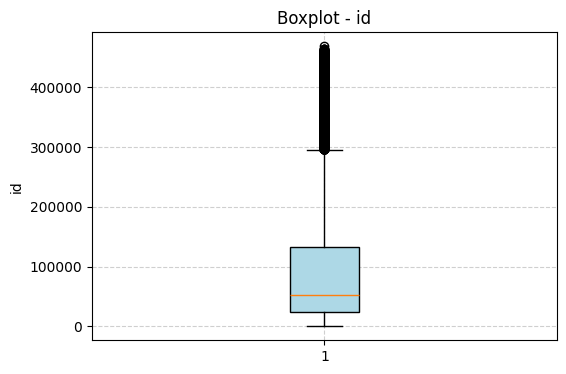

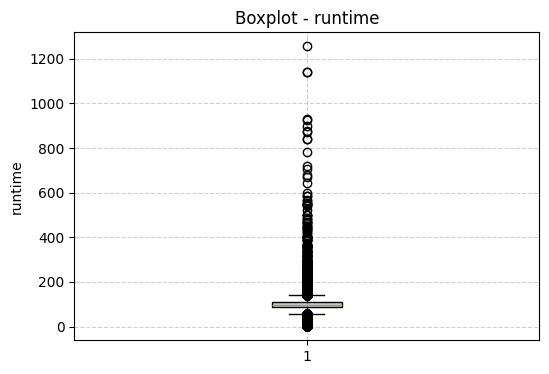

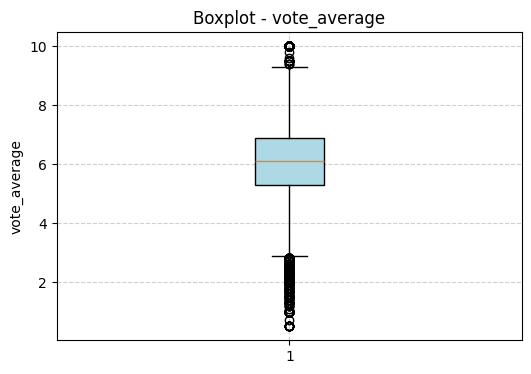

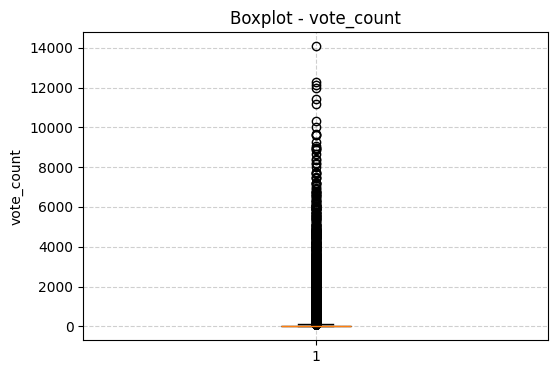

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleciona apenas as colunas numéricas
numeric_cols = movies.select_dtypes(include=['float64', 'int64']).columns

# Gera um boxplot para cada coluna numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(movies[col].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot - {col}', fontsize=12)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

##### RUNTIME

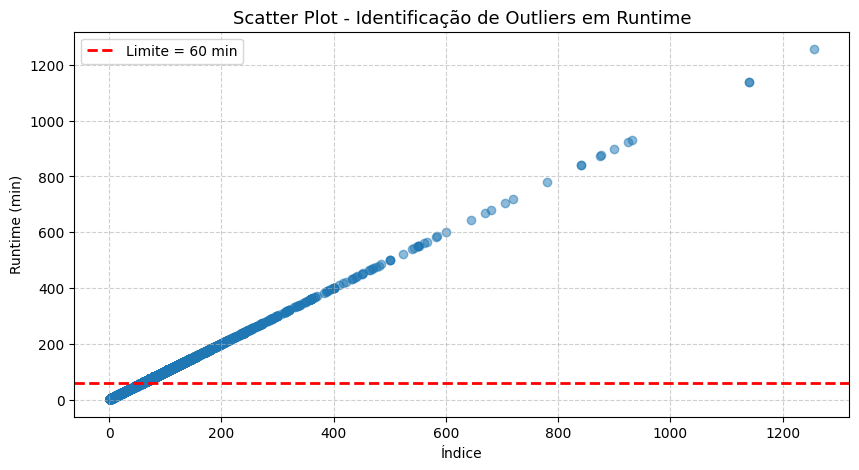

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(movies['runtime'], movies['runtime'], alpha=0.5)
plt.axhline(y=60, color='red', linestyle='--', linewidth=2, label='Limite = 60 min')

plt.title('Scatter Plot - Identificação de Outliers em Runtime', fontsize=13)
plt.xlabel('Índice')
plt.ylabel('Runtime (min)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
# Remove linhas com runtime fora do intervalo [60, 300]
movies = movies[(movies['runtime'] >= 60) & (movies['runtime'] <= 300)]

# Verifica o resultado
print(movies['runtime'].describe())


count    38863.000000
mean       100.858374
std         22.054247
min         60.000000
25%         89.000000
50%         96.000000
75%        109.000000
max        300.000000
Name: runtime, dtype: float64


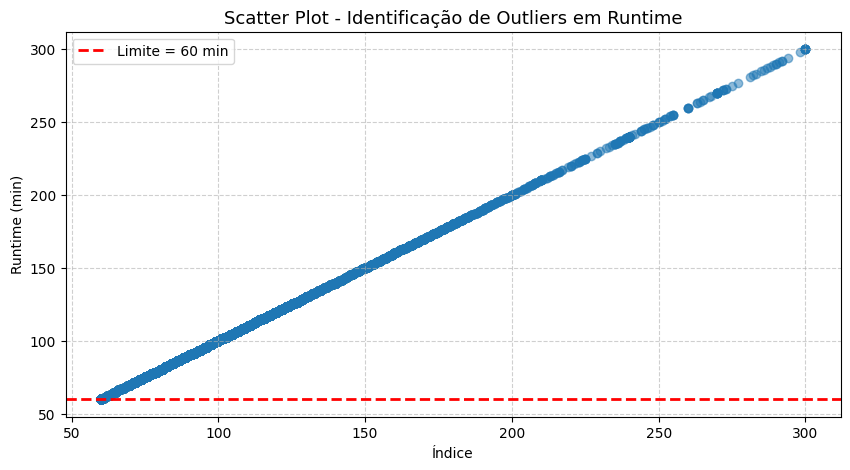

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(movies['runtime'], movies['runtime'], alpha=0.5)
plt.axhline(y=60, color='red', linestyle='--', linewidth=2, label='Limite = 60 min')

plt.title('Scatter Plot - Identificação de Outliers em Runtime', fontsize=13)
plt.xlabel('Índice')
plt.ylabel('Runtime (min)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### STATUS

In [21]:
movies["status"].value_counts()

status
Released           38589
Rumored              174
Post Production       77
In Production         11
Planned               11
Canceled               1
Name: count, dtype: int64

In [22]:
movies = movies[(movies["status"] == "Released" )]

In [23]:
movies["status"].value_counts()

status
Released    38589
Name: count, dtype: int64

In [24]:
movies = movies.drop(columns=["status"])

##### YEAR

In [25]:
movies["year"] = movies["release_date"].dt.year

In [26]:
movies["year"].unique()

array([1995, 1994, 1997, 1996, 1976, 1992, 1967, 1993, 1964, 1977, 1965,
       1982, 1985, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1974, 1970,
       1960, 1955, 1959, 1968, 1980, 1988, 1975, 1948, 1950, 1987, 1973,
       1956, 1958, 1949, 1972, 1998, 1933, 2010, 1943, 1952, 1951, 1957,
       1961, 1954, 1934, 1944, 1963, 1942, 1941, 1953, 1939, 1947, 1946,
       1945, 1938, 1935, 1936, 1926, 1932, 1979, 1971, 1986, 1978, 1966,
       1962, 1983, 1984, 1931, 1922, 1927, 1929, 1930, 1928, 1925, 1999,
       2012, 2000, 1919, 1923, 1920, 1921, 2001, 2011, 1924, 2013, 2002,
       2003, 2004, 1915, 1916, 2005, 2006, 1918, 2007, 2008, 2009, 1914,
       1913, 1917, 2014, 2016, 2015, 1911, 2017, 1912, 1906], dtype=int32)

In [27]:
movies = movies.drop(columns=["release_date"])

##### Numerical Variables

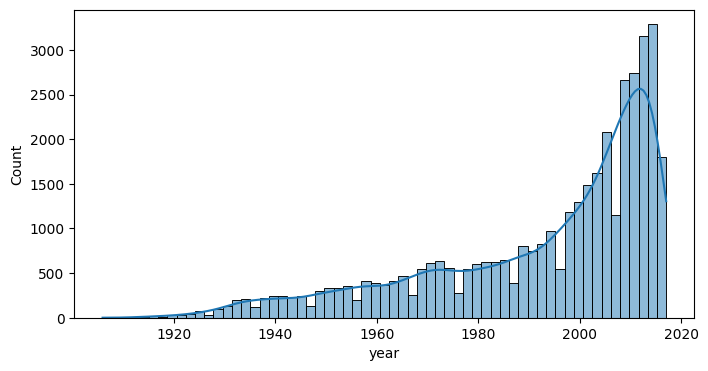

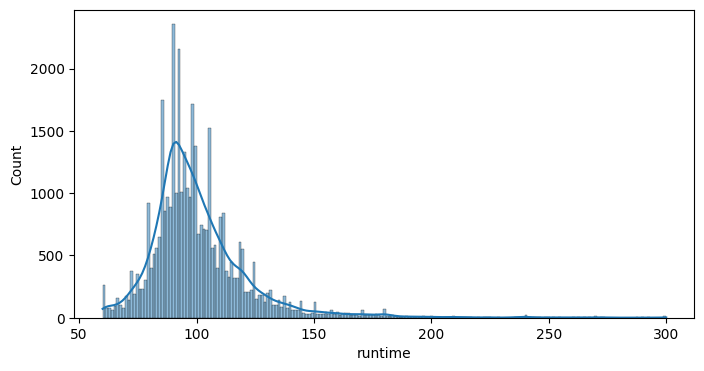

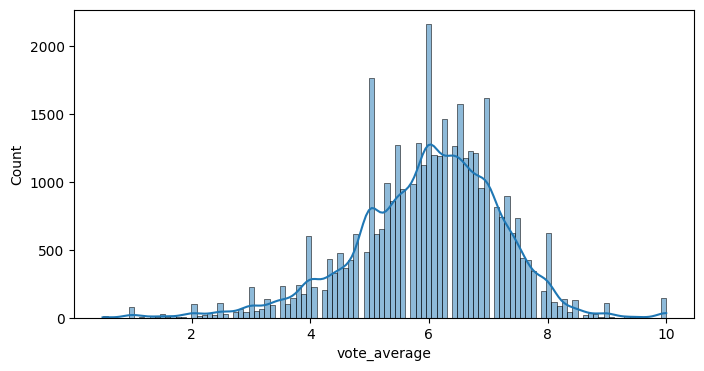

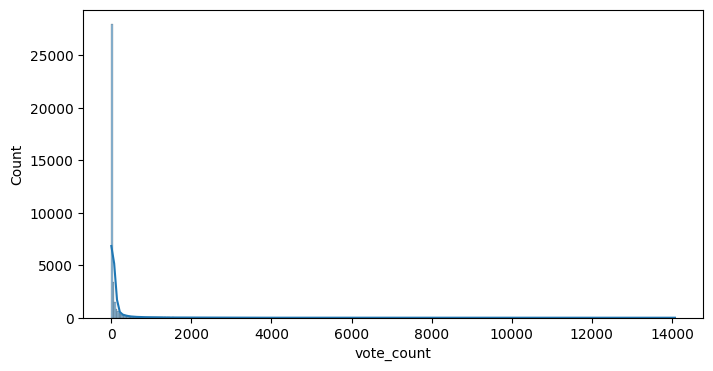

In [28]:
import seaborn as sns

num_vars =["year", "runtime", "vote_average", "vote_count"]

for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(movies[var], kde=True)
    plt.show()

##### VOTE_COUNT

In [29]:
movies = movies[(movies["vote_count"] >= 50)]

In [30]:
movies.shape

(8930, 8)

##### ORIGINAL_LANGUAGE

In [31]:
movies["original_language"].value_counts()

original_language
en    7329
fr     504
it     203
ja     201
de     109
es     107
ko      64
cn      61
hi      56
zh      54
sv      39
da      37
ru      29
pt      25
no      15
nl      13
th      11
pl       8
fa       7
hu       6
cs       6
tr       6
ar       5
el       4
id       4
sr       3
ro       3
he       3
uk       2
xx       2
te       2
et       2
fi       2
nb       1
tl       1
bn       1
ab       1
af       1
bs       1
sh       1
is       1
Name: count, dtype: int64

##### GENRES

In [32]:
movies["genres"].unique()

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}]",
       "[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 36, 'name': 'History'}]",
       "[{'id': 10770, 'name': 'TV Movie'}, {'id': 10751, 'name': 'Family'}, {'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 12, 'name': 'Adventure'}]"],
      shape=(1775,), dtype=object)

In [33]:
import ast 

# --- 1️⃣ Converte a string de gêneros para lista de dicionários ---
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

movies['id_genre'] = movies['genres'].apply(lambda lst: ', '.join(str(d['id']) for d in lst))
movies['genre_name'] = movies['genres'].apply(lambda lst: ', '.join(d['name'] for d in lst))


In [34]:
movies = movies.drop(columns=['genres'])

In [35]:
movies.head(2)

,id,title,runtime,vote_average,vote_count,original_language,year,id_genre,genre_name
0,862,Toy Story,81.0,7.7,5415.0,en,1995,"16, 35, 10751","Animation, Comedy, Family"
1,8844,Jumanji,104.0,6.9,2413.0,en,1995,"12, 14, 10751","Adventure, Fantasy, Family"


##### VOTE_AVERAGE

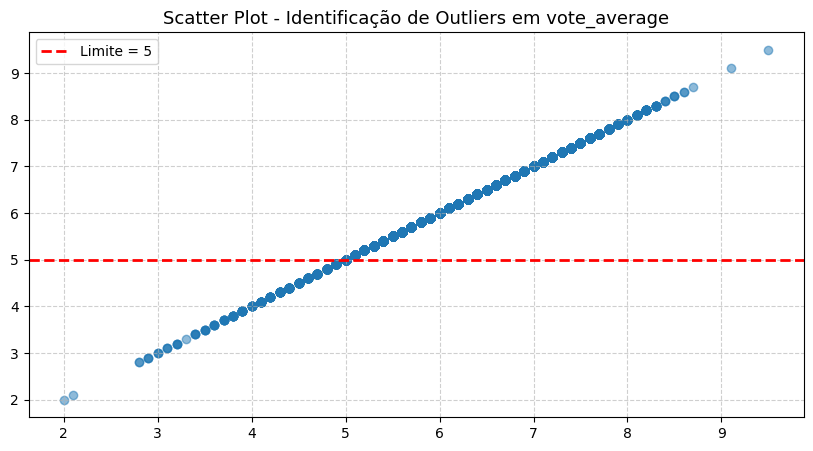

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(movies['vote_average'], movies['vote_average'], alpha=0.5)
plt.axhline(y=5.0, color='red', linestyle='--', linewidth=2, label='Limite = 5')

plt.title('Scatter Plot - Identificação de Outliers em vote_average', fontsize=13)
plt.ylabel('')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8930 entries, 0 to 41014
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8930 non-null   int64  
 1   title              8930 non-null   object 
 2   runtime            8930 non-null   float64
 3   vote_average       8930 non-null   float64
 4   vote_count         8930 non-null   float64
 5   original_language  8930 non-null   object 
 6   year               8930 non-null   int32  
 7   id_genre           8930 non-null   object 
 8   genre_name         8930 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 662.8+ KB


##### INSIGHTS

/var/folders/qd/qrwl6bmj2nzch1gd47ypqcd00000gn/T/ipykernel_7870/2521381359.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts[:10].values, y=genre_counts[:10].index, palette='viridis')


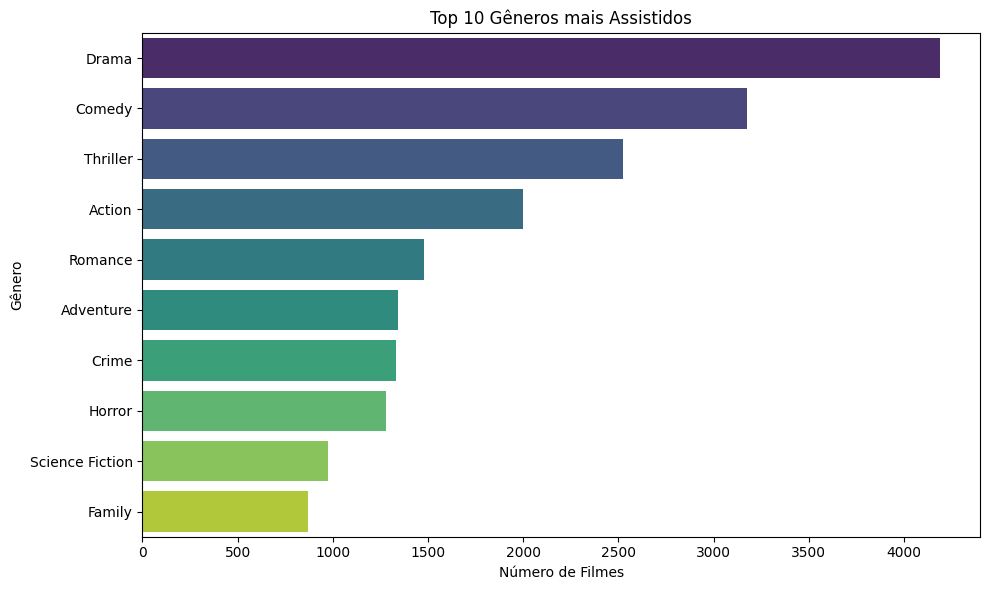

In [38]:
# Expandindo gêneros individuais
genres_series = movies['genre_name'].str.split(', ').explode()

# Contagem dos gêneros
genre_counts = genres_series.value_counts()

# Visualizando os 10 gêneros mais comuns
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts[:10].values, y=genre_counts[:10].index, palette='viridis')
plt.title('Top 10 Gêneros mais Assistidos')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

In [39]:
# Seleciona somente colunas numéricas
numeric_df = movies.select_dtypes(include='number')
numeric_df.head()

numeric_df =  numeric_df.drop(columns=["id"])

In [40]:
correlation_matrix = numeric_df.corr()
correlation_matrix['vote_average'].sort_values(ascending = False)

vote_average    1.000000
runtime         0.326130
vote_count      0.221031
year           -0.316109
Name: vote_average, dtype: float64

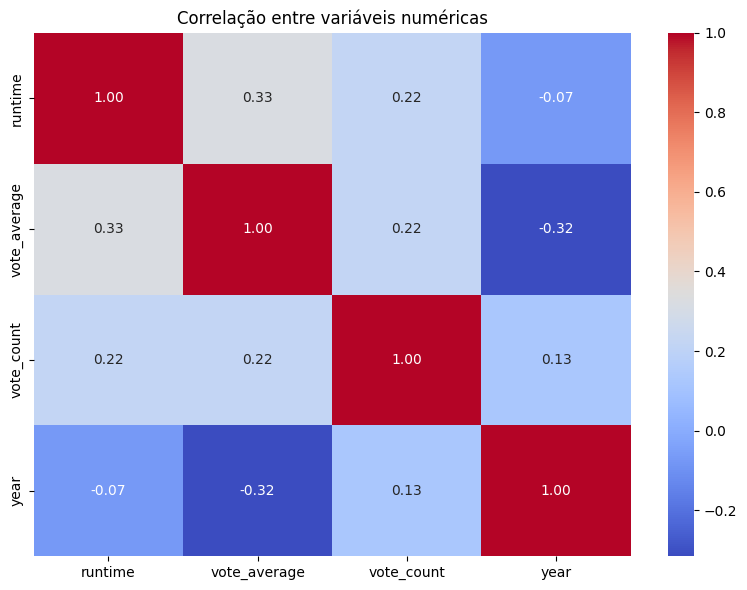

In [41]:
# mapa de calor de correlação
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()

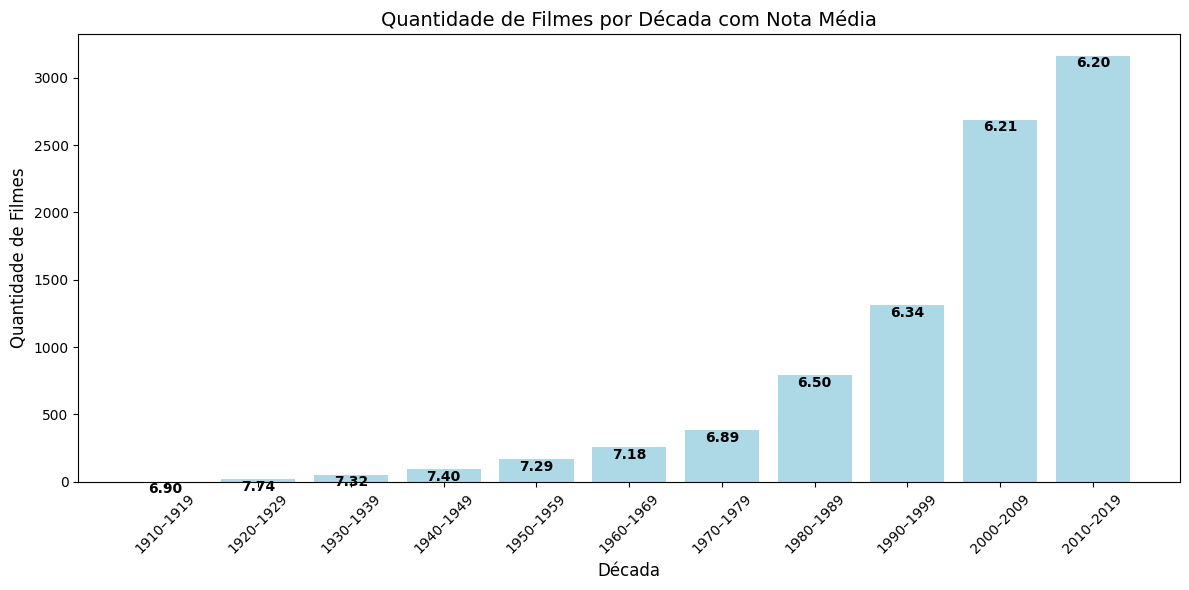

In [42]:
# Cria coluna temporária com o intervalo da década (ex: "2000–2009")
movies['decade_label'] = movies['year'].apply(lambda x: f"{(x // 10)*10}–{((x // 10)*10 + 9)}")

# Conta os filmes por década
decade_counts = movies['decade_label'].value_counts().sort_index()

# Calcula nota média por década
decade_ratings = movies.groupby('decade_label')['vote_average'].mean().loc[decade_counts.index]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(decade_counts.index, decade_counts.values, color='lightblue')

# 🏷️ Insere a média dentro de cada barra
for bar, rating in zip(bars, decade_ratings):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5,
            f"{rating:.2f}", ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# Estética
ax.set_title("Quantidade de Filmes por Década com Nota Média", fontsize=14)
ax.set_xlabel("Década", fontsize=12)
ax.set_ylabel("Quantidade de Filmes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Limpa coluna temporária
movies.drop(columns='decade_label', inplace=True)

plt.show()

## Credits

In [43]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [44]:
credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [45]:
credits["crew"].unique()

array(['[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name

In [46]:
credits["cast"].unique()

array(["[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6Jq

In [47]:
#  Converte as colunas de string para objetos Python ---
credits['cast'] = credits['cast'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
credits['crew'] = credits['crew'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

In [48]:
# --- Extrai o diretor (job == 'Director') ---
credits['director'] = credits['crew'].apply(
    lambda lst: next((member['name'] for member in lst if member.get('job') == 'Director'), None)
)

# --- Extrai o ator principal (primeiro da lista de cast) ---
credits['main_actor'] = credits['cast'].apply(
    lambda lst: lst[0]['name'] if len(lst) > 0 and 'name' in lst[0] else None
)


In [49]:
# --- 5️⃣ Seleciona apenas as colunas desejadas ---
credits_clean = credits[['id', 'director', 'main_actor']]
credits_clean.head()

,id,director,main_actor
0,862,John Lasseter,Tom Hanks
1,8844,Joe Johnston,Robin Williams
2,15602,Howard Deutch,Walter Matthau
3,31357,Forest Whitaker,Whitney Houston
4,11862,Charles Shyer,Steve Martin


## MERGE

In [50]:
# --- 6️⃣ (Opcional) Junta com o DataFrame de filmes ---
movies_full = movies.merge(credits_clean, on='id', how='left')

In [51]:
movies_full.head()

,id,title,runtime,vote_average,vote_count,original_language,year,id_genre,genre_name,director,main_actor
0,862,Toy Story,81.0,7.7,5415.0,en,1995,"16, 35, 10751","Animation, Comedy, Family",John Lasseter,Tom Hanks
1,8844,Jumanji,104.0,6.9,2413.0,en,1995,"12, 14, 10751","Adventure, Fantasy, Family",Joe Johnston,Robin Williams
2,15602,Grumpier Old Men,101.0,6.5,92.0,en,1995,"10749, 35","Romance, Comedy",Howard Deutch,Walter Matthau
3,11862,Father of the Bride Part II,106.0,5.7,173.0,en,1995,35,Comedy,Charles Shyer,Steve Martin
4,949,Heat,170.0,7.7,1886.0,en,1995,"28, 80, 18, 53","Action, Crime, Drama, Thriller",Michael Mann,Al Pacino


In [52]:
movies_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8949 non-null   int64  
 1   title              8949 non-null   object 
 2   runtime            8949 non-null   float64
 3   vote_average       8949 non-null   float64
 4   vote_count         8949 non-null   float64
 5   original_language  8949 non-null   object 
 6   year               8949 non-null   int32  
 7   id_genre           8949 non-null   object 
 8   genre_name         8949 non-null   object 
 9   director           8945 non-null   object 
 10  main_actor         8939 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 734.2+ KB


In [53]:
movies_full.isnull().sum()

id                    0
title                 0
runtime               0
vote_average          0
vote_count            0
original_language     0
year                  0
id_genre              0
genre_name            0
director              4
main_actor           10
dtype: int64

In [54]:
movies_full = movies_full.dropna().reset_index(drop=True)

In [55]:
movies_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8935 entries, 0 to 8934
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8935 non-null   int64  
 1   title              8935 non-null   object 
 2   runtime            8935 non-null   float64
 3   vote_average       8935 non-null   float64
 4   vote_count         8935 non-null   float64
 5   original_language  8935 non-null   object 
 6   year               8935 non-null   int32  
 7   id_genre           8935 non-null   object 
 8   genre_name         8935 non-null   object 
 9   director           8935 non-null   object 
 10  main_actor         8935 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 733.1+ KB


In [56]:
movies_full.head()

,id,title,runtime,vote_average,vote_count,original_language,year,id_genre,genre_name,director,main_actor
0,862,Toy Story,81.0,7.7,5415.0,en,1995,"16, 35, 10751","Animation, Comedy, Family",John Lasseter,Tom Hanks
1,8844,Jumanji,104.0,6.9,2413.0,en,1995,"12, 14, 10751","Adventure, Fantasy, Family",Joe Johnston,Robin Williams
2,15602,Grumpier Old Men,101.0,6.5,92.0,en,1995,"10749, 35","Romance, Comedy",Howard Deutch,Walter Matthau
3,11862,Father of the Bride Part II,106.0,5.7,173.0,en,1995,35,Comedy,Charles Shyer,Steve Martin
4,949,Heat,170.0,7.7,1886.0,en,1995,"28, 80, 18, 53","Action, Crime, Drama, Thriller",Michael Mann,Al Pacino


## Armazenamento

In [62]:
movies_full.to_csv("../dados/processed/movies_full_cleaned.csv", index=False)